In [1]:
import yfinance as yf
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
printDF = lambda df: display(HTML(df.to_html())) #index=False

In [19]:
#https://pypi.org/project/yfinance/
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^GDAXI",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

#         start="2015-01-01", 
        
#         end="2015-01-10",
    
        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d")

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-30,12313.969727,12345.309570,12281.719727,12344.080078,12344.080078,0
2019-05-02,12349.099609,12402.870117,12303.959961,12345.419922,12345.419922,0
2019-05-03,12345.320312,12435.669922,12344.230469,12412.750000,12412.750000,0
2019-05-06,12171.900391,12298.660156,12135.419922,12286.879883,12286.879883,0
2019-05-07,12298.709961,12319.049805,12056.799805,12092.740234,12092.740234,0


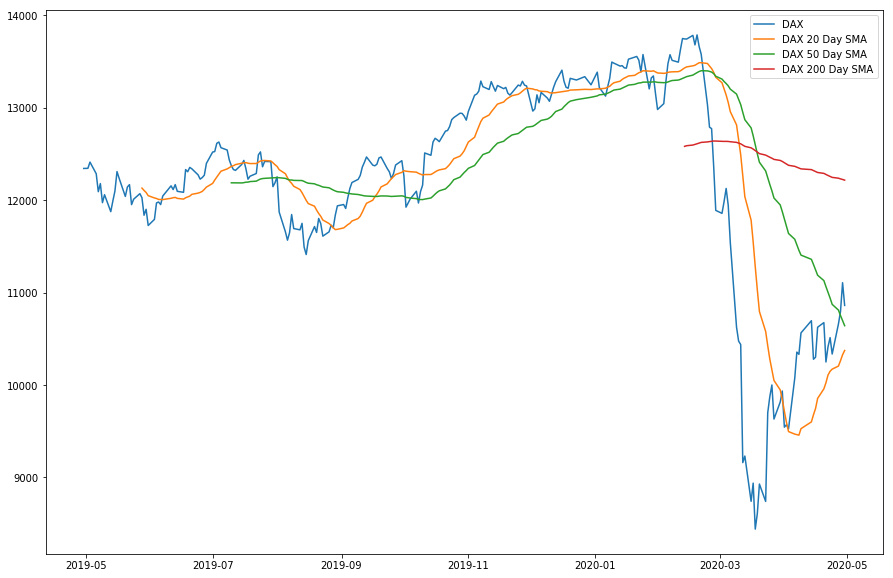

,Open,High,Low,Close,Adj Close,Volume,20 DAY SMA,50 DAY SMA,200 DAY SMA
Date,,,,,,,,,
2019-04-30,12313.969727,12345.309570,12281.719727,12344.080078,12344.080078,0,NaN,NaN,NaN
2019-05-02,12349.099609,12402.870117,12303.959961,12345.419922,12345.419922,0,NaN,NaN,NaN
2019-05-03,12345.320312,12435.669922,12344.230469,12412.750000,12412.750000,0,NaN,NaN,NaN
2019-05-06,12171.900391,12298.660156,12135.419922,12286.879883,12286.879883,0,NaN,NaN,NaN
2019-05-07,12298.709961,12319.049805,12056.799805,12092.740234,12092.740234,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-04-24,10299.309570,10486.469727,10299.309570,10336.089844,10336.089844,120035000,10172.521436,10873.285156,12247.289199
2020-04-27,10551.070312,10660.360352,10523.099609,10659.990234,10659.990234,122476600,10205.472949,10811.576367,12238.722100
2020-04-28,10658.469727,10897.820312,10651.580078,10795.629883,10795.629883,146549900,10263.628467,10752.604766,12231.039648


In [20]:
df = data
data['20 DAY SMA'] = df.Close.rolling(window=20).mean()
data['50 DAY SMA'] = df.Close.rolling(window=50).mean()
data['200 DAY SMA'] = df.Close.rolling(window=200).mean()

fig, ax = plt.subplots(1, figsize=[15, 10])
ax.plot(data.index, data.Close, label='DAX')
ax.plot(data.index, data['20 DAY SMA'], label='DAX 20 Day SMA')
ax.plot(data.index, data['50 DAY SMA'], label='DAX 50 Day SMA')
ax.plot(data.index, data['200 DAY SMA'], label='DAX 200 Day SMA')
ax.legend()
plt.show()

df

In [ ]:
class Chart:
    def __init__(self, data):
        self.data = data
        self.current_i = 0
        self.listener = []
    def register_new_listener(self, listener):
        self.listener.append(listener)
    def keep_tracking(self):
        while len(self.data) - 1 > self.current_i:
            current_element = self.data.iloc[self.current_i]
            self.current_i = self.current_i + 1
            for i in self.listener:
                i.listen(current_element.name, current_element['Close'])

class SMAStrategy:
    def __init__(self, days):
        self.df = pd.DataFrame(columns=['value'])
        self.days = days
        self.name = "{} Days SMA".format(days)
    def recommend_to_invest(self, time, value):
        self.df.loc[time] = value
        self.df['mean'] = self.df['value'].rolling(window=self.days).mean()
        return self.df.iloc[len(self.df) - 1]['mean'] > self.df.iloc[len(self.df) - 2]['mean']

class Bot:
    def __init__(self, name, strategy):
        self.name = name
        self.budget = 0
        self.is_invested = False
        self.strategy = strategy
        self.df = pd.DataFrame(columns=['value', 'action', 'budget'])
    def listen(self, time, value):
        rec = self.strategy.recommend_to_invest(time, value)
        row = {'value': value, 'action': rec}
        if rec and not self.is_invested:
            self.start = value
            self.is_invested = True
        if not rec and self.is_invested:
            self.budget += (value - self.start)
            self.is_invested = False
        row['budget'] = self.budget
        series = pd.Series(row)
        series.name = time
        self.df = self.df.append(series)

chart = Chart(data)
for i in np.arange(5, 55, 5):
    bot = Bot('SMA ' + str(i), SMAStrategy(i))
    chart.register_new_listener(bot)
chart.keep_tracking()
# printDF(larsBot.df)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


,Close,SMA 5_budget,SMA 10_budget,SMA 15_budget,SMA 20_budget
2020-04-23,10513.790039,-350.601,-523.801,140.71,-92.2617
2020-04-24,10336.089844,-429.541,-523.801,140.71,-92.2617
2020-04-27,10659.990234,-429.541,-523.801,140.71,-92.2617
2020-04-28,10795.629883,-429.541,-523.801,140.71,-92.2617
2020-04-29,11107.740234,-429.541,-523.801,140.71,-92.2617


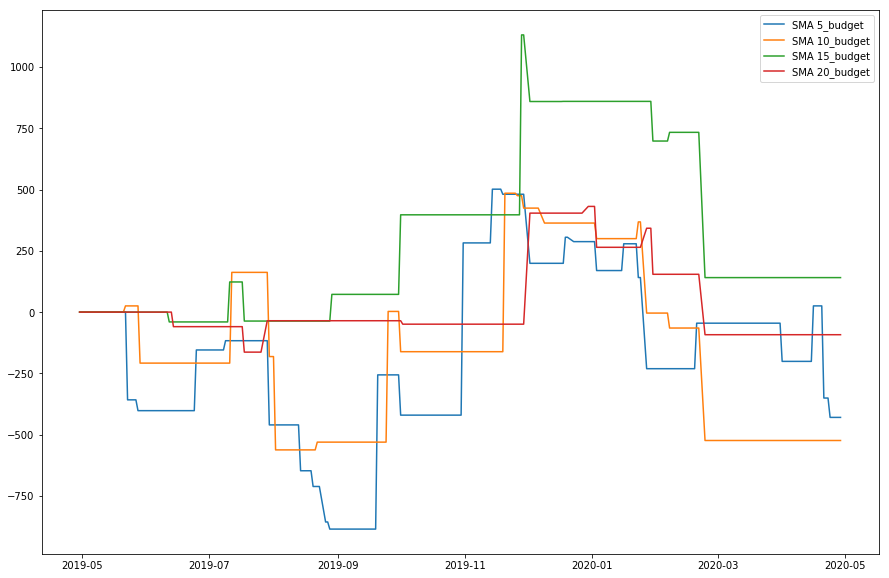

In [195]:
# result = pd.concat([lars.df, lars.strategy.df['mean']], axis=1, join='inner')
botDFs = [i.df.rename(columns={'budget': i.name + "_budget"})[i.name + "_budget"] for i in chart.listener]
result = pd.concat([data['Close']] + botDFs, axis=1, join='inner')

fig, ax = plt.subplots(1, figsize=[15, 10])
for i in [i for i in result.columns if 'budget' in i]:
    ax.plot(result.index, result[i], label=i)
ax.legend()
fig.show()

result.tail(5)